In [174]:
from keras.datasets import imdb
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Data acqusition

In [175]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [176]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [177]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [178]:
print(type(train_data[0]))

<class 'list'>


# Decoding 

In [179]:
# Get word Dictionary
word_index = imdb.get_word_index() 
print(word_index['the'])

1


In [180]:
# Reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(reverse_word_index[2])

and


In [181]:
# Decode to Review
decoded_review = ' '. join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Data Preparation
<!--  --> Why data preparation? Its because we can not pass a list into the network 
<!--  --> Network receives a tensor prepared below

In [182]:
# one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
#     Set of specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

# Vectorizing train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [183]:
# Vectorizing train and test labels
y_train = np.asarray(train_labels, dtype='float32')
y_test = np.asarray(test_labels, dtype='float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# Building Network
<!--  --> Input data = Vectors
<!--  --> Labels = scalars (0s and 1s)
<!--  --> Network type = Fully connected Dense layer
<!--  --> Activation Functions = relu and sigmoid
<!--  --> Tensor operation ---> output = relu(dot(W, input) + b)
<!--  --> Architecture = Three layer architecture (relu 2, sigmoid 3)

In [184]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [185]:
# Model compilation
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
# Creating validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val  = y_train[:10000]
partial_y_train = y_train[10000:]

In [187]:
# Training a model for 20 epochs
result = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.5217 - accuracy: 0.7857 - val_loss: 0.3870 - val_accuracy: 0.8741
Epoch 2/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.3076 - accuracy: 0.9019 - val_loss: 0.3082 - val_accuracy: 0.8849
Epoch 3/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.2247 - accuracy: 0.9255 - val_loss: 0.2846 - val_accuracy: 0.8889
Epoch 4/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1754 - accuracy: 0.9416 - val_loss: 0.2743 - val_accuracy: 0.8896
Epoch 5/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.1432 - accuracy: 0.9543 - val_loss: 0.2817 - val_accuracy: 0.8880
Epoch 6/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.1147 - accuracy: 0.9669 - val_loss: 0.3224 - val_accuracy: 0.8765
Epoch 7/20
15000/15000 [==============================] - 3s 1

In [188]:
history_dict = result.history
history_dict['loss']

[0.5216890289783478,
 0.3075697772343953,
 0.22471388313770294,
 0.17537285068035124,
 0.14317588210900625,
 0.11472919389804204,
 0.09875054283539454,
 0.08279667965571086,
 0.06623343112071355,
 0.05306793286005656,
 0.04431914451122284,
 0.03459992353320122,
 0.027582636121908824,
 0.021785720301171145,
 0.019155244585871697,
 0.011201551440358162,
 0.011667320226629575,
 0.009662119633952776,
 0.008885335930188497,
 0.0036318857468664646]

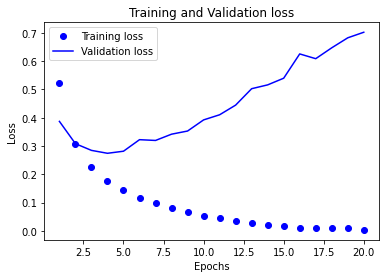

In [189]:
# Ploting training and validation loss 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

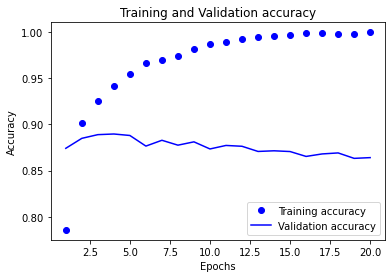

In [190]:
# Ploting training and validation accuracy
plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [191]:
result = model.evaluate(x_test, y_test)
result

25000/25000 [==============================] - 5s 206us/step


[0.7716496742844582, 0.8496400117874146]

# Using Model for prediction


In [192]:
pred = model.predict(x_test)
pred

array([[0.00541252],
       [0.9999999 ],
       [0.94951564],
       ...,
       [0.00106848],
       [0.0213496 ],
       [0.431122  ]], dtype=float32)